# PCA 클래스


In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-01-06 14:39:18--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-01-06 14:39:18--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-01-06 14:39:18--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
import numpy as np
fruits=np.load('fruits_300.npy')
fruits_2d=fruits.reshape(-1,100*100)

In [3]:
fruits_2d.shape

(300, 10000)

+ 원본 데이터셋 : 10000차원  
    10000개의 feature

In [4]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [5]:
pca.components_.shape

(50, 10000)

+ 50개의 주성분을 뽑아냄  
+ 주성분의 차원은 원본 데이터의 차원과 같음

In [6]:
pca.components_[0].shape

(10000,)

In [7]:
import matplotlib.pyplot as plt

In [8]:
def draw_fruits(arr,ratio=1):
    n=len(arr) # 샘플 개수(몇 장인지)
    rows=int(np.ceil(n/10))
    cols=n if rows<=1 else 10 
    fig,axs=plt.subplots(rows,cols,
                         figsize=(cols*ratio,rows*ratio),
                         squeeze=False)
    
    axs=axs.ravel()
    for i in range(n):
        axs[i].imshow(arr[i],cmap='gray_r')
        axs[i].axis('off')
        
    plt.show()

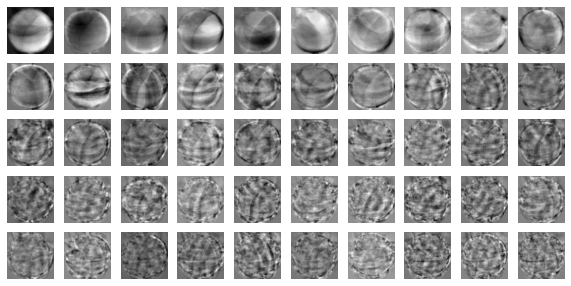

In [9]:
draw_fruits(pca.components_.reshape(-1,100,100))

+ 1만개의 특성 -> 50개의 PC로 축소

In [10]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


# 원본 데이터 재구성  

In [11]:
fruits_inverse=pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


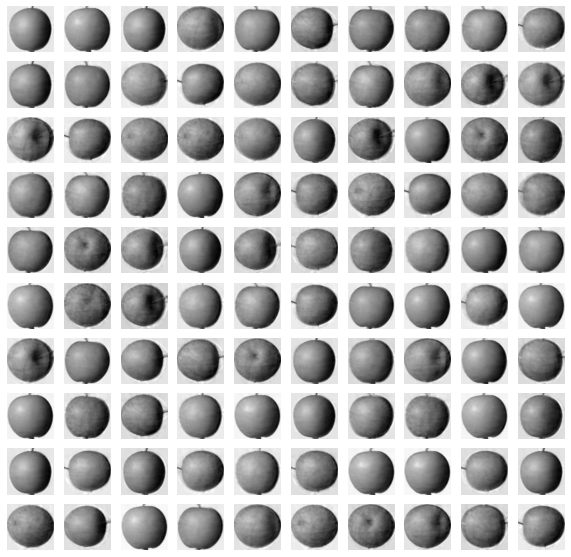

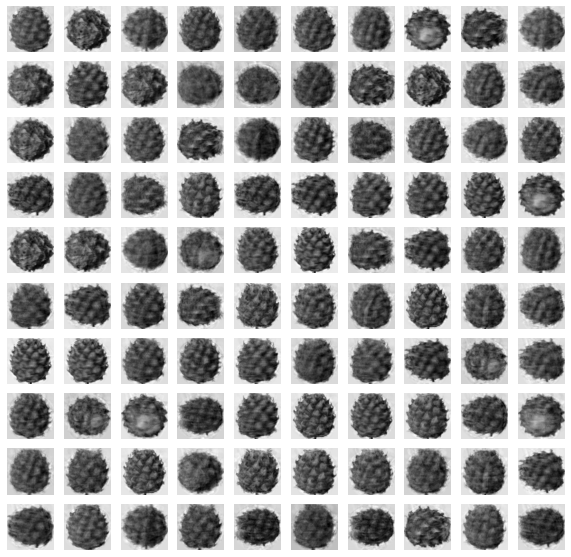

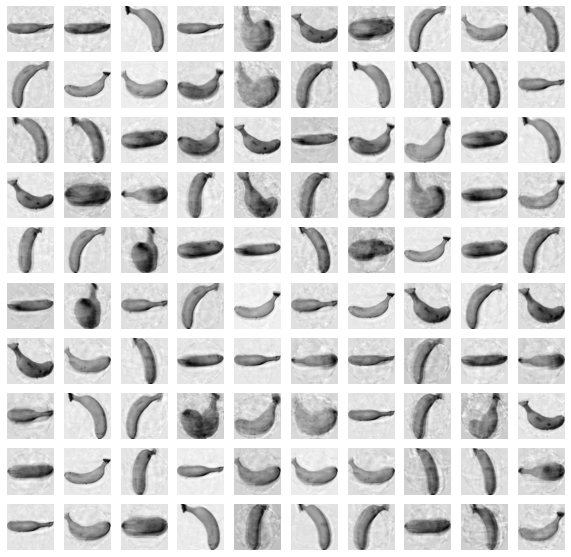

In [12]:
fruits_reconstruct=fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print()

# 설명된 분산  
explained variance

In [13]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578894, 0.00511201, 0.00486382, 0.00480346,
       0.00447832, 0.00437317, 0.00408038, 0.00389466, 0.00372436,
       0.00359274, 0.00331464, 0.00317844, 0.00304207, 0.00303743,
       0.00288941, 0.0027589 , 0.00264931, 0.00255732, 0.00251891,
       0.0024736 , 0.00239439, 0.00230885, 0.0022226 , 0.00216391,
       0.00214053, 0.00195091, 0.00192197, 0.00190631, 0.00183299,
       0.00182415, 0.00172839, 0.00167436, 0.00162841, 0.00160736])

In [14]:
np.sum(pca.explained_variance_ratio_)

0.9215289914163822

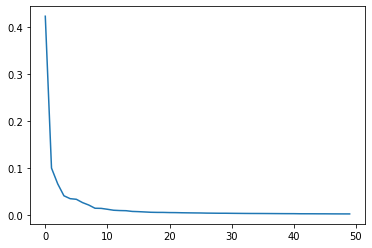

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

# 다른 알고리즘과 함께 사용하기

In [16]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [17]:
target=np.array([0]*100+[1]*100+[2]*100)

In [18]:
from sklearn.model_selection import cross_validate
scores=cross_validate(lr,fruits_2d,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.724549913406372


In [19]:
scores=cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.05955729484558105


In [20]:
pca=PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [21]:
print(pca.n_components_)

2


In [22]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [23]:
scores=cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.99
0.07777929306030273


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


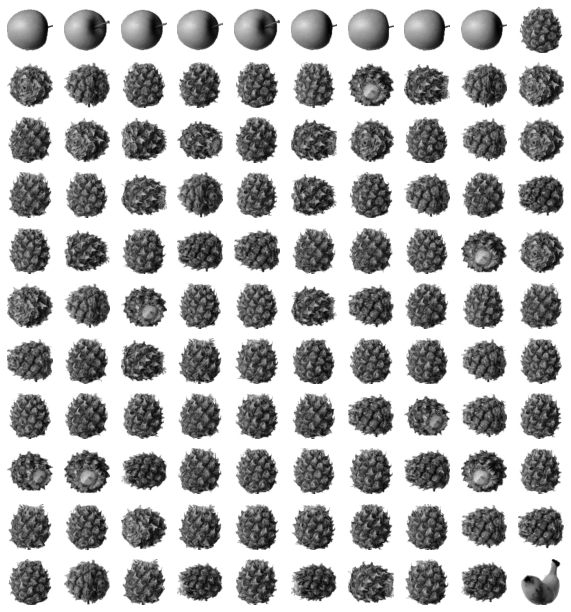

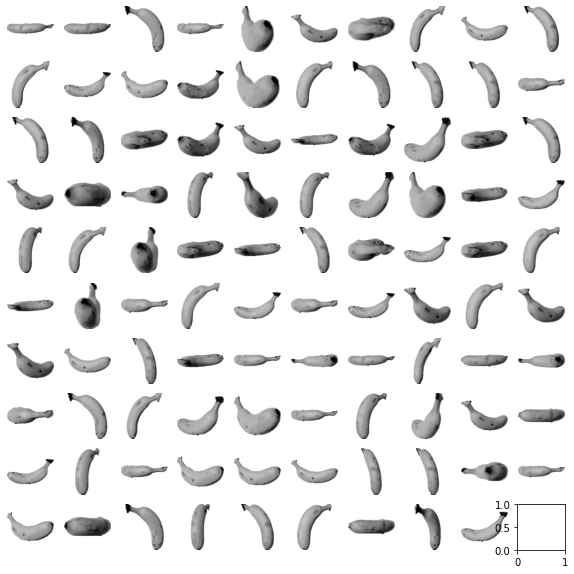

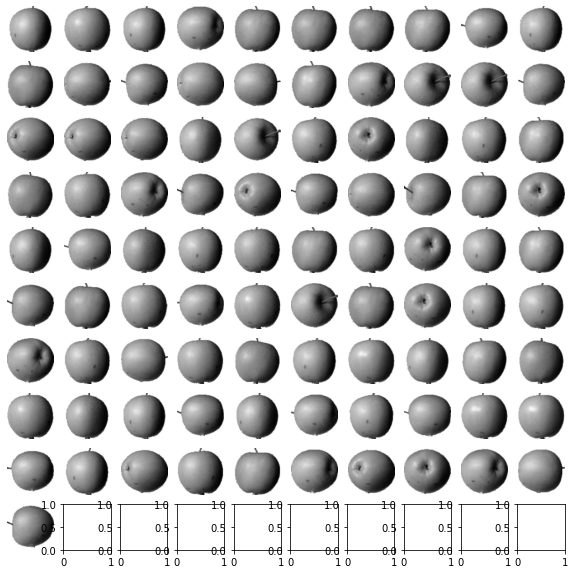

In [25]:
for label in range(3):
    draw_fruits(fruits[km.labels_==label])
    print()

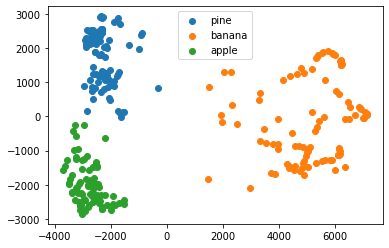

In [26]:
for label in range(0,3):
    data=fruits_pca[km.labels_==label]
    plt.scatter(data[:,0],data[:,1])
plt.legend(['pine','banana','apple'])
plt.show()